In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2025
# License: MIT

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Linear Function

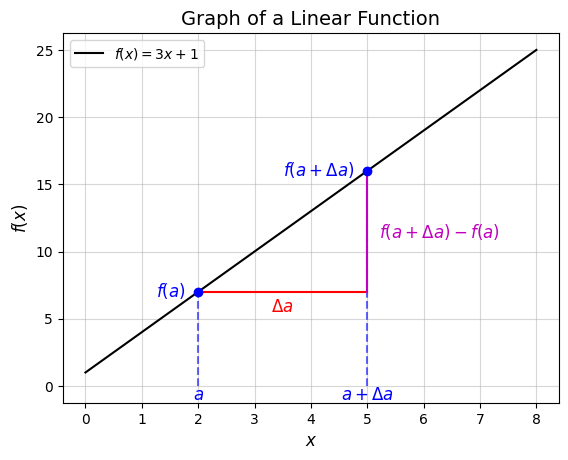

In [3]:
# Generate a figure for a linear function f(x) = 3x + 1

m = 3  # Slope
b = 1  # Intercept

# Define the x range
x = np.linspace(0, 8, 100)
y = m * x + b

# Choose two points (a, f(a)) and (a + Δa, f(a + Δa)) for visualization
a = 2
delta_a = 3
b_val = a + delta_a

# Compute function values at these points
f_a = m * a + b
f_b = m * b_val + b

# Create the figure
fig, ax = plt.subplots()

# Plot the linear function
ax.plot(x, y, 'k-', label=r'$f(x) = 3x + 1$')

# Highlight points (a, f(a)) and (a + Δa, f(a + Δa))
ax.scatter([a, b_val], [f_a, f_b], color='blue', zorder=3)

# Draw dashed lines to show rise and run
ax.plot([a, a], [0, f_a], 'b--', alpha=0.6)
ax.plot([b_val, b_val], [0, f_b], 'b--', alpha=0.6)
ax.plot([a, b_val], [f_a, f_a], 'r')
ax.plot([b_val, b_val], [f_a, f_b], 'm')

# Label the key points and differences
ax.text(a, -1, r"$a$", color="blue", fontsize=12, ha='center')
ax.text(b_val, -1, r"$a + \Delta a$", color="blue", fontsize=12, ha='center')
ax.text(a + delta_a / 2, 5.5, r"$\Delta a$", color="red", fontsize=12, ha='center')
ax.text(a - 0.75, f_a + 0.1, r"$f(a)$", color="blue", fontsize=12, va='center')
ax.text(b_val - 1.5, f_b + 0.1, r"$f(a+\Delta a)$", color="blue", fontsize=12, va='center')
ax.text(b_val + 0.2, (f_a + f_b) / 2, r"$f(a+\Delta a) - f(a)$", color="m", fontsize=12, va='center')

# Set axis labels
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$f(x)$", fontsize=12)
ax.set_title("Graph of a Linear Function", fontsize=14)

# Show grid and legend
ax.legend()
ax.grid(True, alpha=0.5)
plt.savefig('figures/linear_function.pdf')

Hyperplane

NameError: name 'bbox_in' is not defined

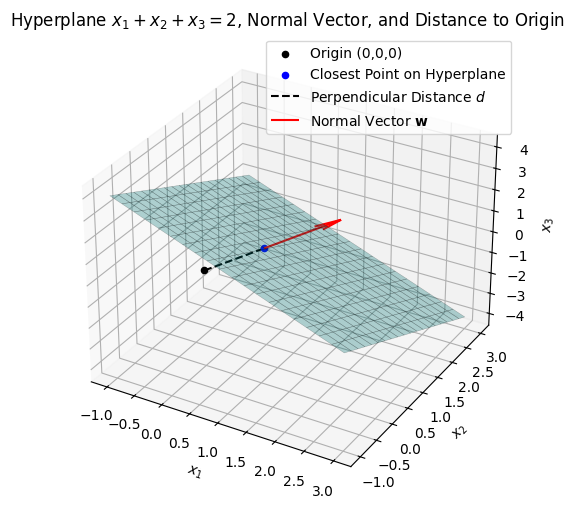

In [4]:
# Define the updated normal vector w and bias term b 
w = np.array([1, 1, 1])  
b = -2  

# Generate x, y grid
x = np.linspace(-1, 3, 20)
y = np.linspace(-1, 3, 20)
X, Y = np.meshgrid(x, y)

# Compute corresponding z values for the hyperplane equation x1 + x2 + x3 = 2
Z = (2 - X - Y) / w[2]

# Define the origin and closest point on the hyperplane
origin = np.array([0, 0, 0])
closest_point = (-b / np.dot(w, w)) * w  # Projection formula for closest point

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the hyperplane
ax.plot_surface(X, Y, Z, color='cyan', alpha=0.3, edgecolor='k', linewidth=0.3)

# Plot origin and closest point
ax.scatter(*origin, color='black', label="Origin (0,0,0)")
ax.scatter(*closest_point, color='blue', label="Closest Point on Hyperplane")

# Draw line segment showing the perpendicular distance
ax.plot([origin[0], closest_point[0]], 
        [origin[1], closest_point[1]], 
        [origin[2], closest_point[2]], 'k--', label="Perpendicular Distance $d$")

ax.quiver(closest_point[0], closest_point[1], closest_point[2], 
          w[0], w[1], w[2], color='r', length=1.5, normalize=True, label="Normal Vector $\mathbf{w}$")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title("Hyperplane $x_1 + x_2 + x_3 = 2$, Normal Vector, and Distance to Origin")
ax.legend()
plt.savefig('figures/hyperplane.pdf', bbox_in)

Polynomials

In [ ]:
# Define Runge's function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Generate equally spaced interpolation points (high-degree polynomial interpolation)
num_points = 11  # Number of interpolation points
x_interp = np.linspace(-1, 1, num_points)
y_interp = runge_function(x_interp)

# Generate dense x values for plotting
x_dense = np.linspace(-1, 1, 400)
y_true = runge_function(x_dense)

# Perform polynomial interpolation
coefficients = np.polyfit(x_interp, y_interp, num_points - 1)
y_poly = np.polyval(coefficients, x_dense)

# Plot the function and the interpolation
plt.plot(x_dense, y_true, label="Runge's function", linewidth=2)
plt.plot(x_dense, y_poly, label=f"{num_points-1}th-degree polynomial interpolation", linestyle="--", linewidth=2)
plt.scatter(x_interp, y_interp, color='red', zorder=3, label="Interpolation points")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Runge's Phenomenon: Oscillations in High-Degree Polynomial Interpolation")
plt.legend()
plt.grid(alpha=0.5)

plt.savefig('figures/runge_phenomenon.pdf')

Trigonometric Functions

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

# Draw unit circle
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=2)
ax.add_patch(circle)

# Angle theta
theta = np.pi / 4  # 45 degrees

# Compute coordinates
x = np.cos(theta)
y = np.sin(theta)

# Draw the radius
ax.plot([0, x], [0, y], 'r', linewidth=2, label=r'Radius ($r=1$)')

# Draw x and y projections
ax.plot([x, x], [0, y], 'm--', linewidth=1, label=r'$\cos \theta$')  # Cosine projection on x-axis
ax.plot([0, x], [y, y], 'g--', linewidth=1, label=r'$\sin \theta$')  # Sine projection on y-axis

# Draw x and y axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Mark key points
ax.scatter([0, x], [0, y], color='black', zorder=3)
ax.text(x/4, y/4 - 0.17, r'$\theta$', fontsize=12, color='red', ha='right', va='bottom')
ax.text(x, -0.1, r'$\cos \theta$', fontsize=12, color='magenta', ha='center')
ax.text(-0.05, y, r'$\sin \theta$', fontsize=12, color='green', va='center', ha='right')
ax.text(x, y, r'$(\cos \theta, \sin \theta)$', fontsize=12, color='black', ha='left', va='bottom')

# Set limits and aspect ratio
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.savefig('figures/trigonometric_functions.pdf', bbox_inches='tight')

Hyperbolic Functions

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

# Plot the unit hyperbola x^2 - y^2 = 1 for x >= 1 and x <= -1
x = np.linspace(1, 3, 300)
y = np.sqrt(x**2 - 1)
ax.plot(x, y, 'b', label=r'Unit Hyperbola: $x^2 - y^2 = 1$')
ax.plot(x, -y, 'b')

x_neg = np.linspace(-3, -1, 300)
y_neg = np.sqrt(x_neg**2 - 1)
ax.plot(x_neg, y_neg, 'b')
ax.plot(x_neg, -y_neg, 'b')

# Choose a representative x value and compute (cosh(x), sinh(x))
theta = np.pi / 4  # Example angle
cosh_theta = np.cosh(theta)
sinh_theta = np.sinh(theta)

# Draw the radius from the origin to (cosh(theta), sinh(theta))
ax.plot([0, cosh_theta], [0, sinh_theta], 'r', linewidth=2, label=r'Radius ($r=\cosh x$)')

# Draw projection lines to better illustrate sinh(x) and cosh(x)
ax.plot([cosh_theta, cosh_theta], [0, sinh_theta], 'm--', linewidth=1)
ax.plot([0, cosh_theta], [sinh_theta, sinh_theta], 'g--', linewidth=1)

# Scatter and labels
ax.scatter([cosh_theta], [sinh_theta], color='black', zorder=3)
ax.text(cosh_theta + 0.1, sinh_theta, r'$(\cosh x, \sinh x)$', fontsize=12, color='black', ha='left', va='bottom')
ax.text(cosh_theta, -0.3, r'$\cosh x$', fontsize=12, color='m', ha='center')
ax.text(-0.1, sinh_theta, r'$\sinh x$', fontsize=12, color='g', va='center', ha='right')

# Labels and formatting
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.savefig('figures/hyperbolic_functions.pdf', bbox_inches='tight')